In [186]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [187]:
auto_df = pd.read_csv('data/Auto.csv')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [188]:
auto_df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [189]:
#find and remove non numeric values in "horsepower" column
auto_df[~auto_df['horsepower'].apply(lambda x: x.isnumeric())]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [190]:
#remove rows that have question mark
auto_df_numeric = auto_df[auto_df['horsepower'].apply(lambda x: x.isnumeric())]
#horsepower column is of type object (or string), so convert to integer before calculating summary statistics
auto_df_numeric['horsepower']=auto_df_numeric['horsepower'].astype('int64')
auto_df_numeric['horsepower'].dtype

C:\Users\sb063p\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


dtype('int64')

In [191]:
auto_df_numeric.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [192]:
#convert pandas datframe columns to numpy arrays
X = auto_df_numeric.horsepower.values
Y = auto_df_numeric.mpg.values
X.shape

(392,)

In [193]:
#regression using Scipy
from scipy import stats
stats.linregress(X,Y)

LinregressResult(slope=-0.15784473335365351, intercept=39.935861021170453, rvalue=-0.77842678389777564, pvalue=7.0319890294062644e-81, stderr=0.0064455005176850353)

In [194]:
#reshape numpy arrays because sklearn expects a certain format
X=X.reshape(392,1)
Y=Y.reshape(392,1)
X.shape

(392, 1)

In [195]:
#from sklearn import linear_model
regr_obj=linear_model.LinearRegression()
regr_obj.fit(X,Y)
#print values of coefficient and intercept
print(regr_obj.coef_)
print(regr_obj.intercept_)

[[-0.15784473]]
[ 39.93586102]


In [196]:
#regression using statsmodel
import statsmodels.api as sm
#add a column of 1s to x
x=sm.add_constant(X,prepend=False)
print (x.shape)
stats_model = sm.OLS(Y,x)
statsmodel_results=stats_model.fit()
print(statsmodel_results.summary())

(392, 2)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 30 Nov 2016   Prob (F-statistic):           7.03e-81
Time:                        10:17:46   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.1578      0.006    -24.489

In [197]:
#regression using statsmodel (without converting pandas dataframe to numpy array)
import statsmodels.api as sm
temp_df = auto_df_numeric
temp_df['intercept']=1
x_temp = temp_df[['intercept','horsepower']]
y_temp = temp_df[['mpg']]
temp_results = sm.OLS(y_temp,x_temp).fit()
print(temp_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 30 Nov 2016   Prob (F-statistic):           7.03e-81
Time:                        10:17:47   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.0

C:\Users\sb063p\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [206]:
#Calculate Residual Standard Error (RSE)
import math
RSE = math.sqrt(temp_results.mse_resid)
print(RSE)
print(Y.mean())
print(RSE*100/Y.mean())
#RSE is 20% of mean Y

4.905756919545939
23.4459183673
20.9237140669


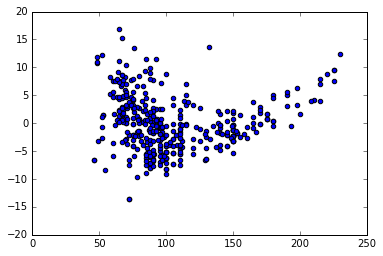

In [214]:
#plot the residuals to evaluate linear fit
plt.scatter(x_temp['horsepower'],temp_results.resid)

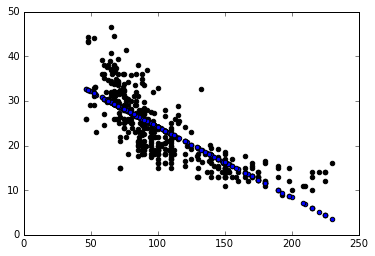

In [119]:
%matplotlib inline
plt.scatter(X,Y,color='black')
plt.scatter(X,regr_obj.predict(X))

In [123]:
#predicted mpg for horsepower of 98
regr_obj.predict(98)

array([[ 24.46707715]])

In [207]:
#Answers
#(i) yes, horsepower and mpg are related because the p-value is very small, i.e., 7.0319890294062644e-81
#(ii) not very strong, because the RSE is 20% of mean Y
#(iii) the relation between predictor and response is negative 
#(iv) predicted mpg for horsepower of 98 is 24.46 mpg. 